<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB41_A01_Classical_Gates_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b><font color="blue"> Solutions for </font>Implementation of Classical Gates Using Quantum Circuits</b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

if in_colab():
    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

<a name="task2"></a>
### Task 2

Complete the following table that corresponds to reversible $AND$ gate, where $\ket{x_1}$ and $\ket{x_2}$ are the inputs of the $AND$ gate and the $\ket{y} =0$ is the output. Which three-qubit quantum gate can we use to implement the $AND$ operator in a reversible manner?

<h3>Solution</h3>

$AND: \begin{array}{ccc|ccc} \mathbf{In} & & &\mathbf{Out} & & \\
\hline \mathbf{In} & \mathbf{In}& \mathbf{In} & \mathbf{Out}& \mathbf{Out}& \mathbf{Out} \\
\hline 0 & 0 & 0 & 0 & 0 & 0 \\
\hline 0 & 1 & 0 & 0 & 1 & 0 \\
\hline 1 & 0 & 0 & 1 & 0 & 0 \\
\hline 1 & 1 & 0 & 1 & 1 & 1 \\
\end{array}$
    
We can use CCNOT (Toffoli) gate.

<a name="task3"></a>
### Task 3

Design a quantum (reversible) circuit for implementing $OR$ gate. Test your circuit on all possible two bit inputs. Measure only the output qubit.

<h3>Solution</h3>

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

for input in ['00','01','10','11']:

    mycircuit1 = QuantumCircuit(3,1)

    #Initialization - Note qiskit order
    if input[0] == '1':
        mycircuit1.x(1)
    if input[1] == '1':
        mycircuit1.x(0)

    mycircuit1.cx(0,2)
    mycircuit1.cx(1,2)
    mycircuit1.ccx(0,1,2)

    mycircuit1.measure(2,0)

    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(mycircuit1)
    print("Input:", input, "Output:", counts)

Input: 00 Output: {'0': 1000}
Input: 01 Output: {'1': 1000}
Input: 10 Output: {'1': 1000}
Input: 11 Output: {'1': 1000}


<a name="task4"></a>
### Task 4

Fredkin gate is a three qubit controlled swap gate which swaps the second and third qubits if the first qubit is in state $ \ket{1} $. It is represented with the following matrix.

<img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch4/fredkin.png" width="20%" align="center">

Create a method named `fredkin` and implement Fredkin gate using $CNOT$ and $CCNOT$ operators. Use unitary simulator to check the unitary matrix corresponding to your circuit. (Follow the Qiskit order.)

<h3> Solution </h3>

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def fredkin(): # Applies fredkin gate to the input using CX and CCX gates.
    circuit = QuantumCircuit(3)
    circuit.cx(0,1)
    circuit.ccx(2,1,0)
    circuit.cx(0,1)
    return circuit

  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


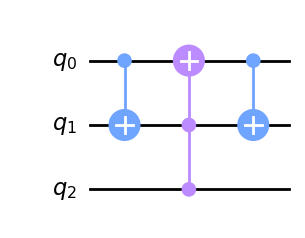

In [4]:
circuit = fredkin()

job = execute(circuit, Aer.get_backend('unitary_simulator'), shots=1)
u = job.result().get_unitary(circuit, decimals=3).data
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

circuit.draw(output="mpl")

<a name="task5"></a>
### Task 5

Prove that $U_f$ is reversible, by showing that given $x$ and $y \oplus f(x)$, $y$ can be computed.

_Hint: Use the fact that $x \oplus x = 0$ for any bit x and $\oplus$ operation is associative._

<h3> Solution </h3>

$(y \oplus f(x)) \oplus f(x) = y \oplus (f(x) \oplus f(x)) = y \oplus 0 = y.$

The first equality follows by associativity and the second equality follows by the property of XOR operation.

<a name="task6"></a>
### Task 6

After applying the operator $U_f$, what is the new state of the output qubit $\ket{y}$ in terms of $f(x)$ if initially:

- $\ket{y} = \ket{0}$

- $\ket{y} = \ket{1}$

- $\ket{y} = \ket{-}$

<h3> Solution </h3>

- If $\ket{y}$ is $\ket{0}$, output is $f(x)$

- If $\ket{y}$  is $\ket{1}$, output is negation of $f(x)$

- If $\ket{y}$  is $\ket{-}$,

\begin{align*}
U_f \ket{x}\ket{-} &= U_f \ket{x}  \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= \frac{1}{\sqrt{2}} (U_f\ket{x}\ket{0}-U_f\ket{x}\ket{1}) \\
&= \frac{1}{\sqrt{2}} (\ket{x}\ket{f(x)\oplus 0} - \ket{x}\ket{f(x)\oplus 1}) \\
&= \ket{x} \frac{1}{\sqrt{2}}\mypar{ \ket{f(x)}-\ket{f(x)\oplus 1}  } \\
&= \ket{x} (-1)^{f(x)} \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= (-1)^{f(x)} \ket{x} \ket{-}
\end{align*}


Therefore, we have the following transformation:
$$ U_f \ket{x}\ket{-} \xrightarrow{U_f} (-1)^{f(x)} \ket{x}\ket{-} $$
   
Depending on the value of x, and therefore f(x), we see that we have a phase of -1 is kicked back to the front of the first register when f(x)=1.

This idea is useful in many quantum algorithms.